# Import some related dependencies
1.   Numpy: a package for array transformation
2.   Pandas: a package for loading data with .csv/.xlsx formats
3.   Matplotlib: a package for data visualization
4.   Skearn: a package including many machine learning approaches
5.   Tensorflow: a package for neural networks modeling
6.   Keras: a package for neural networks modeling which is established on Tensorflow

In [ ]:
import numpy as np #for array operation
import pandas as pd #to read the data
import matplotlib.pyplot as plt #for graphical plots
from sklearn.model_selection import train_test_split #to split training data and testing data 
from sklearn.preprocessing import OneHotEncoder #for label one-hot encoding 
import keras #for ANN model construction
import tensorflow as tf #for ANN model construction

# Load data using pandas package
Data structure and data visualiazation


In [ ]:
df = pd.read_csv('/content/final_df.csv', index_col=None)  


In [ ]:
print (df.shape)
print(df.head())

(70692, 20)
   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       0         0          1   18       0       0   
1                0       1         1          1   24       1       0   
2                0       1         0          1   27       0       0   
3                0       1         1          1   16       0       0   
4                0       1         0          1   14       1       0   

   HeartDiseaseorAttack  PhysActivity  Veggies  HvyAlcoholConsump  \
0                     0             1        1                  0   
1                     0             0        0                  0   
2                     0             1        1                  0   
3                     0             1        1                  0   
4                     0             1        1                  0   

   AnyHealthcare  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0              1        1         3         1         0    1

In [ ]:
df[["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "GenHlth", "DiffWalk", "Sex", "Age", "Education", "Income"]] = df[["Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "GenHlth", "DiffWalk", "Sex", "Age", "Education", "Income"]].astype("category")
print(df.dtypes)
print (df.shape)

Diabetes_binary         category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object
(70692, 20)


In [ ]:
#X_train, y_train = df.values[:,1:], df.values[:,0]
#X_test, y_test = df.values[:,1:], df.values[:,0]

X = df.values[:, 1:]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Reshape the target variable
y_train_re = y_train.reshape(-1, 1)
y_test_re = y_test.reshape(-1, 1)

In [ ]:
onehot = OneHotEncoder()                     #An objective for one-hot package
onehot.fit(y_train_re)                          #Transform labels to be the one-hot format
y_train_onehot = onehot.transform(y_train_re).toarray() #Transform training labels to be one-hot format
y_test_onehot = onehot.transform(y_test_re).toarray() #Transform testing labels to be one-hot format
print (y_test_onehot.shape)

(21208, 2)


# Model training

In [ ]:
model = keras.Sequential()                         
model.add(keras.layers.Dense(13, input_shape=(19,))) # In the first layer, we have 13 neurons for output and 19 neurons for input
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(8))                   
model.add(keras.layers.Dropout(0.1))                   # Use for alleviating model overfitting, 0.1 is the dropout rate.
model.add(keras.layers.Activation("relu"))              # Use of activation function of Rectified Linear Unit (ReLU)
model.add(keras.layers.Dense(5))                          
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(2))                      
model.add(keras.layers.Activation("softmax"))           # softmax is used for probability estimation, which is suitable for classification tasks
model.compile(tf.keras.optimizers.SGD(learning_rate = 1e-3), 'categorical_crossentropy', metrics='acc') # compile the model with a SGD optimizer, a loss of categorical crossentropy, and a accuracy metric
model.summary()
history = model.fit(X_train, y_train_onehot, epochs = 400, batch_size = 256, verbose = 2, validation_data = (X_test, y_test_onehot)) #training the model with some hyper-parameters

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 13)                260       
                                                                 
 activation_32 (Activation)  (None, 13)                0         
                                                                 
 dense_33 (Dense)            (None, 8)                 112       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 activation_33 (Activation)  (None, 8)                 0         
                                                                 
 dense_34 (Dense)            (None, 5)                 45        
                                                                 
 activation_34 (Activation)  (None, 5)                

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


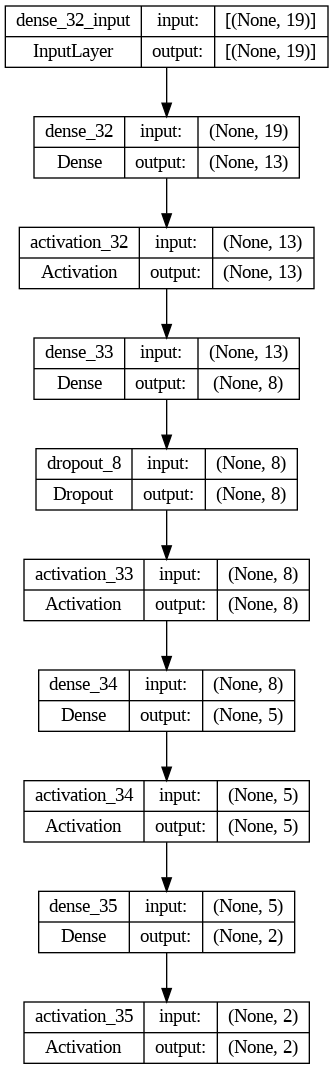

In [ ]:
!pip install pydot
!pip install graphviz
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
prediction = model.predict(X_test)                    # Predict the testing set
print (model.evaluate(X_test, y_test_onehot)) # Evaluation the prediction

663/663 [==============================] - 2s 3ms/step - loss: 0.5183 - acc: 0.7424
[0.5182881355285645, 0.7423613667488098]


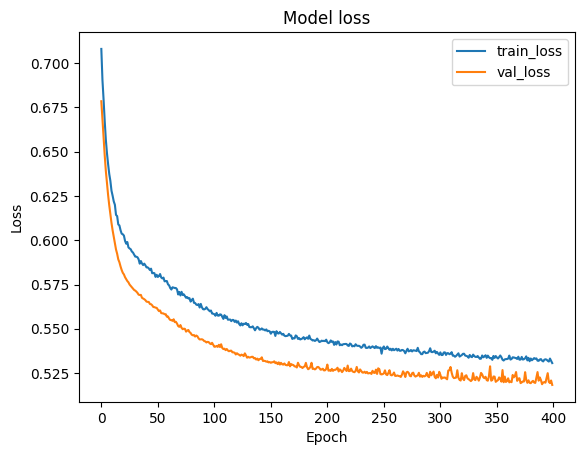

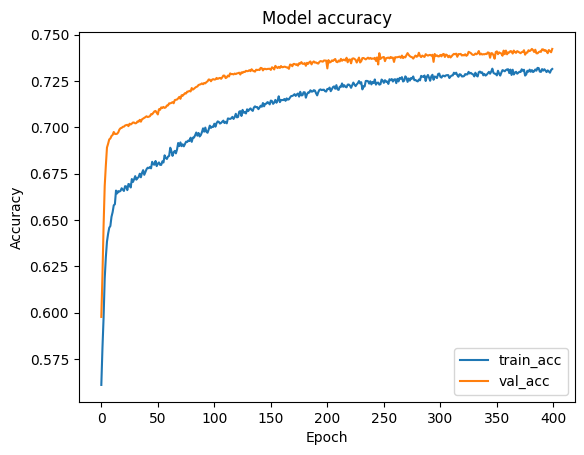

In [ ]:
# Plot the loss curve
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediction new patient
new_patient_data = np.array([[0, 0, 1, 25.1, 0, 0, 0, 0, 1, 0, 0, 3, 3, 5, 0, 0, 13, 3, 7]])
prediction = model.predict(new_patient_data)
print(prediction)

1/1 [==============================] - 0s 68ms/step
[[0.30353603 0.696464  ]]


##Performance evaluation

663/663 [==============================] - 1s 1ms/step


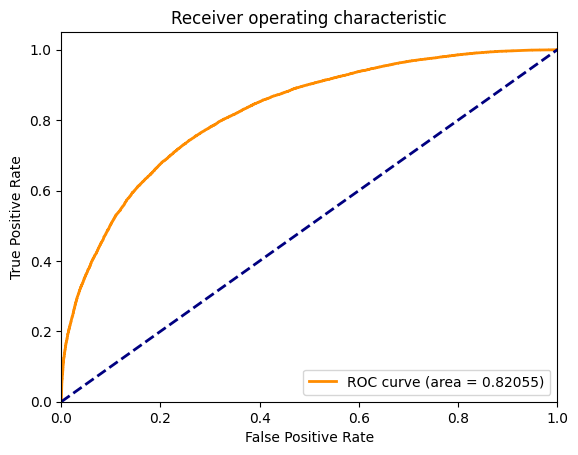

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate class probabilities
y_pred = model.predict(X_test)

# Combine class probabilities for class 0 and class 1
y_pred_combined = np.column_stack((y_pred[:, 0], y_pred[:, 1]))

# Calculate the overall ROC curve
fpr, tpr, thresholds = roc_curve(y_test_onehot.ravel(), y_pred_combined.ravel())
roc_auc = auc(fpr, tpr)

# View the overall ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Converting predictions to binary format
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test_onehot, axis=1)

# Creating the confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate model evaluation statistics
report = classification_report(y_test_bin, y_pred_bin)

# Display model evaluation statistics
print("Classification Report:")
print(report)

tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confusion Matrix:
[[6989 3612]
 [1852 8755]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72     10601
           1       0.71      0.83      0.76     10607

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208

Sensitivity: 0.8253983218629207
Specificity: 0.6592774266578625
